## Plot Cruise Maps

- python>=3.6
- using cartopy (basemap is deprecated)

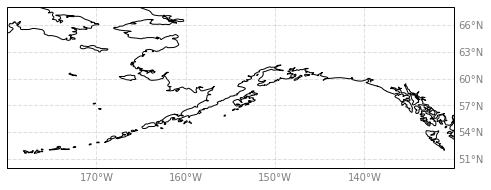

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8, 8),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=1., color='gray', alpha=0.25, linestyle='--')
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.xlocator = mticker.FixedLocator([-180, -170, -160, -150, -140, -130])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 10, 'color': 'gray'}
        gl.xlabel_style = {'size': 10, 'color': 'gray'}
    return fig, ax

projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

dx = dy = 0.5
extent = [-180, -130, 50, 66]
fig,ax = make_map(projection=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

### Pull bathymetry from erddap

In [9]:
#using xarray for data read
import xarray as xa
import cmocean

server_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSS111'
bathy = xa.open_dataset(server_url) 

bathy_sub = bathy.sel(latitude=slice(72,55),longitude=slice(-180,-150))

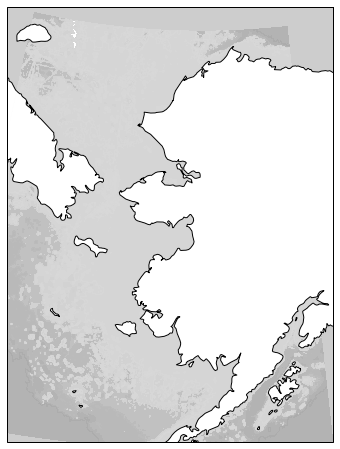

In [21]:
dx = dy = 0.5
extent = [-175, -150, 55, 72.5]
fig,ax = make_map(projection=projection)

#ax.plot(df['longitude'], df['latitude'], 'b', label=alamo, transform=transformation)
#ax.plot(df['longitude'], df['latitude'], '+k', markersize=1, label=alamo, transform=transformation)
#ax.pcolormesh(bathy_sub.longitude, bathy_sub.latitude, bathy_sub.topo, cmap=cmocean.cm.deep_r,
#         transform=transformation)
ax.contourf(bathy_sub.longitude, bathy_sub.latitude, bathy_sub.topo, 
            levels=[-1000, -200, -100, -70, -50,], 
            colors=('#737373','#969696','#bdbdbd','#d9d9d9','#f0f0f0'), 
            extend='both', alpha=.75,
            transform=transformation)
#leg = ax.legend(bbox_to_anchor=(1.45,1), loc='upper right')

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)